## **Step 1: Environment Setup**

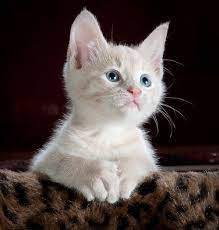

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
from google.colab import files
from keras.preprocessing import image

# **Step 2: Load and Preprocess the CIFAR-10 Dataset**

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



# **Step 3: Build a TensorFlow CNN Model**
With sparse categorical cross entropy

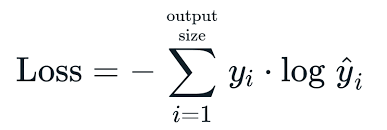

In [ ]:
# Define a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary
model.summary()

# **Step 4: Prepare the dataset and the model training**

In [ ]:
num_epochs = 5
batch_size = 32


# Prepare the training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# Define the loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Function to perform a training step
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_function(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, predictions

# Function to perform a validation step
def val_step(images, labels):
    predictions = model(images, training=False)
    loss = loss_function(labels, predictions)
    return loss, predictions

# **Step 5: Training, Validation and Evaluation**

In [ ]:
# Training loop
for epoch in range(num_epochs):
    # Training
    progress_bar_train = tqdm(enumerate(train_dataset), total=len(train_dataset), desc='Training', leave=False)
    for step, (images, labels) in progress_bar_train:
        loss, predictions = train_step(images, labels)
        progress_bar_train.set_postfix(loss=loss.numpy())

    # Validation
    progress_bar_val = tqdm(enumerate(val_dataset), total=len(val_dataset), desc='Validation', leave=False)
    for step, (images, labels) in progress_bar_val:
        loss, predictions = val_step(images, labels)
        progress_bar_val.set_postfix(loss=loss.numpy())

    print(f'Epoch {epoch+1}/{num_epochs} completed')
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Training:   0%|          | 0/1563 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1/5 completed
313/313 - 1s - loss: 0.8980 - accuracy: 0.6930 - 732ms/epoch - 2ms/step
Test Loss: 0.8980, Test Accuracy: 0.6930


Training:   0%|          | 0/1563 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2/5 completed
313/313 - 1s - loss: 0.8693 - accuracy: 0.7056 - 696ms/epoch - 2ms/step
Test Loss: 0.8693, Test Accuracy: 0.7056


Training:   0%|          | 0/1563 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3/5 completed
313/313 - 1s - loss: 0.8464 - accuracy: 0.7109 - 784ms/epoch - 3ms/step
Test Loss: 0.8464, Test Accuracy: 0.7109


Training:   0%|          | 0/1563 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4/5 completed
313/313 - 1s - loss: 0.8772 - accuracy: 0.7044 - 679ms/epoch - 2ms/step
Test Loss: 0.8772, Test Accuracy: 0.7044


Training:   0%|          | 0/1563 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5/5 completed
313/313 - 1s - loss: 0.9552 - accuracy: 0.6906 - 681ms/epoch - 2ms/step
Test Loss: 0.9552, Test Accuracy: 0.6906


# **Step 6: Model Evaluation**

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


# **Step 7: Visualization of Results**


In [ ]:
import numpy as np

# Class names for the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display images and predictions with interpolation
def display_predictions(images, labels, num_images=5):
    # Select a random subset of images
    idx = np.random.choice(range(len(images)), num_images, replace=False)
    selected_images = images[idx]
    selected_labels = labels[idx]

    # Get model predictions
    predictions = model.predict(selected_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Display the images with interpolation
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(selected_images[i], interpolation='lanczos')  # Use Lanczos interpolation
        plt.title(f'Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[selected_labels[i][0]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display predictions using test dataset
display_predictions(test_images, test_labels)




# **Image upload and prediction**

Please download the following image before proceeding

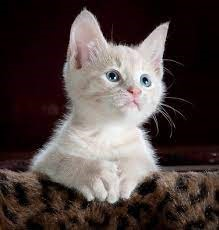

In [ ]:
# Please download the following image, take a look, and upload it on the system
# https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500

import numpy as np
from google.colab import files
from keras.preprocessing import image

# Class names for the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Upload an image file
uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(32, 32))  # Adjust target size to match CIFAR-10 input
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_class_name = class_names[predicted_class[0]]
    print(fn)
    print(f'Predicted class: {predicted_class_name}')
